In [3]:
# 1.Préparation des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=column_names, na_values="?")

# Nettoyage des données
data = data.dropna()
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

# Affichage des premières lignes
print(data.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       1  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


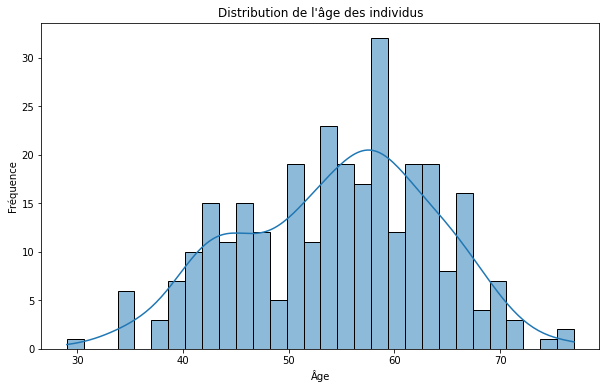

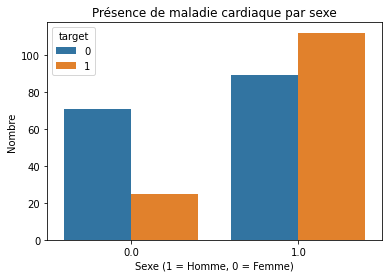

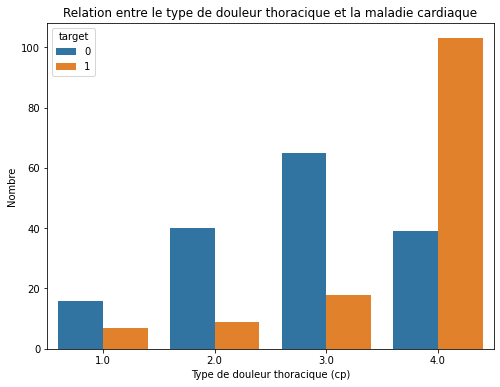

          trestbps        chol     thalach
target                                    
0       129.175000  243.493750  158.581250
1       134.635036  251.854015  139.109489


In [4]:
#  2.Analyse exploratoire des données (EDA)
# Distribution de l'âge
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribution de l\'âge des individus')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

# Différence dans la présence de maladie cardiaque entre les sexes
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='target', data=data)
plt.title('Présence de maladie cardiaque par sexe')
plt.xlabel('Sexe (1 = Homme, 0 = Femme)')
plt.ylabel('Nombre')
plt.show()

# Relation entre le type de douleur thoracique et la maladie cardiaque
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', hue='target', data=data)
plt.title('Relation entre le type de douleur thoracique et la maladie cardiaque')
plt.xlabel('Type de douleur thoracique (cp)')
plt.ylabel('Nombre')
plt.show()

# Valeurs moyennes de la pression artérielle, du cholestérol et de la fréquence cardiaque maximale
mean_values = data.groupby('target').agg({'trestbps': 'mean', 'chol': 'mean', 'thalach': 'mean'})
print(mean_values)

In [5]:
# 3. Pré-traitement des données
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparation des caractéristiques et de la cible
X = data.drop('target', axis=1)
y = data['target']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# 4. Modélisation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialisation des modèles
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

# Entraînement et évaluation des modèles
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_proba)
    }

# Affichage des résultats
results_df = pd.DataFrame(results).T
print(results_df)

                        Accuracy  Precision    Recall  F1-Score   AUC-ROC
Logistic Regression     0.866667   0.833333  0.833333  0.833333  0.942130
K-Nearest Neighbors     0.833333   0.818182  0.750000  0.782609  0.939815
Support Vector Machine  0.883333   0.869565  0.833333  0.851064  0.953704
Decision Tree           0.816667   0.740741  0.833333  0.784314  0.819444
Random Forest           0.866667   0.807692  0.875000  0.840000  0.949074
AdaBoost                0.866667   0.833333  0.833333  0.833333  0.922454
